In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/AI/Classification_Model/archive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
/content/gdrive/MyDrive/AI/Classification_Model/archive
'EfficientNetB0-100-(224 X 224)- 98.40.h5'   sports.csv   test	 train	 valid


Importing Necessary Libraries

In [2]:
#!pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

import os
import tensorflow as tf

from tensorflow import keras

from tensorflow.python.keras import models, layers, optimizers, utils
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_hub as hub


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator



Examine Dataset

The train directory contain 100 sub directories, one for each of the 100 sport classes. Each sub directory contains the training images for that sport. Note the number of images for each sport varies so the training data is not perfectly balanced. However each sport has at least 90 images.

Images: 224,224,3 in jpg format


In [4]:
base = "/content/gdrive/MyDrive/AI/Classification_Model/archive"

In [5]:
train_dir = os.path.join(base,'train')
test_dir = os.path.join(base, 'test')
valid_dir = os.path.join(base, 'valid')

train = keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(224, 224), seed=42, batch_size=32)
validation = keras.preprocessing.image_dataset_from_directory(valid_dir, image_size=(224, 224), seed=42, batch_size=16)
test = keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(224, 224), seed=42, batch_size=16)

Found 13635 files belonging to 100 classes.
Found 510 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


### Examining the images and its classes





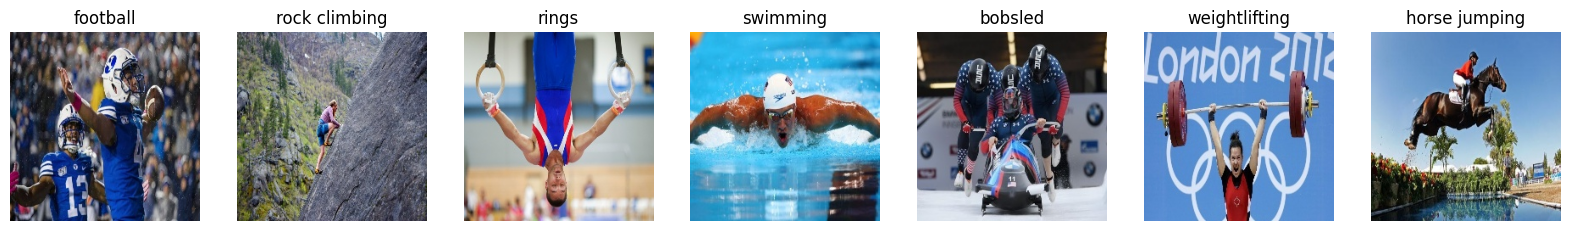

In [6]:
# Select 8 different image files
image_files = []
sport_names = []
number_images = 7
for i in range(number_images):
    sport_dir = random.choice(os.listdir(train_dir))
    sport_path = os.path.join(train_dir, sport_dir)
    image_file = random.choice(os.listdir(sport_path))
    image_path = os.path.join(sport_path, image_file)
    image_files.append(image_path)
    sport_names.append(sport_dir)

# Load and display the images horizontally
fig, axs = plt.subplots(1, number_images, figsize=(20, 3))
for i in range(number_images):
    # Load the image from the file
    image_path = image_files[i]
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    image_array = tf.keras.preprocessing.image.img_to_array(image)

    # Rescale the pixel values between 0 and 1
    image_array /= 255.

    # Get the sport name from the list
    sport_name = sport_names[i]

    # Display the image with the sport name as the title
    axs[i].imshow(image_array)
    axs[i].set_title(sport_name)
    axs[i].axis('off')

plt.show()

In [7]:
img_size = (224, 224)
batch_size = 32

In [8]:
# Define the data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)
val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 13635 images belonging to 100 classes.
Found 510 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [9]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(100, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
# Train the model
history = model.fit(
    train_generator,
    epochs=4,
    validation_data=val_generator
)

model.save('sports_100.h5')


Epoch 1/4
427/427 [==============================] - 1977s 5s/step - loss: 4.2220 - accuracy: 0.0495 - val_loss: 4.1020 - val_accuracy: 0.0588
Epoch 2/4
427/427 [==============================] - 1966s 5s/step - loss: 3.6986 - accuracy: 0.1183 - val_loss: 3.3482 - val_accuracy: 0.1569
Epoch 3/4
427/427 [==============================] - 1954s 5s/step - loss: 3.2276 - accuracy: 0.2000 - val_loss: 3.1139 - val_accuracy: 0.2059
Epoch 4/4
427/427 [==============================] - 1920s 4s/step - loss: 2.9438 - accuracy: 0.2525 - val_loss: 2.5235 - val_accuracy: 0.3373


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluating the model

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

16/16 [==============================] - 141s 9s/step - loss: 2.4173 - accuracy: 0.3540
Test accuracy: 0.3540000021457672


Improving the model

In [ ]:
# Probably going to add early stopping
